In [1]:
import pandas as pd
import numpy as np  

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [3]:
import scipy.stats as stats
from sklearn.model_selection import cross_val_score


In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer

In [11]:
df = pd.read_csv('../../EDA/Multivariate_analysis/train.csv' , usecols=['Survived','Age', 'Fare'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\mohot\AppData\Local\Temp\ipykernel_32500\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]    

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)    

check feature is normally distributed or NOT:

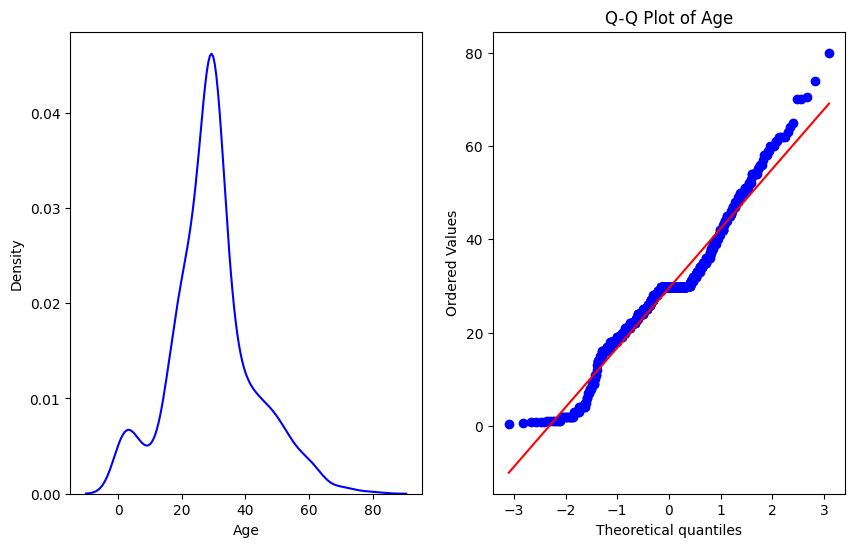

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.kdeplot(x_train['Age'], label='Age Distribution', color='blue')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

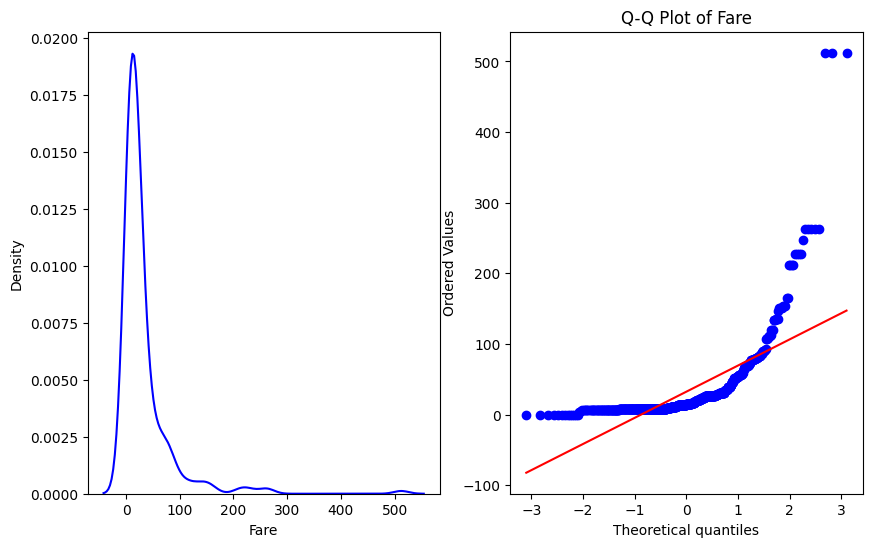

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.kdeplot(x_train['Fare'], label='Age Distribution', color='blue')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')
plt.show()

In [21]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [22]:
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.6815642458100558
